In [20]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as shibal
import mplfinance as mplf

# Get Data

## Event Data

In [21]:
eventCols = ["event", "timestamp", "type", "stablecoin"]

with open("../data/ERC20-stablecoins/event_data.csv") as event_f:
    event_df = pd.read_csv(event_f, encoding='latin-1', nrows=5)
    print(f"\n📊 First 5 rows:")


# Parse timestamp if it is unix seconds
event_df["timestamp"] = pd.to_datetime(event_df["timestamp"], unit="s", utc = True)

event_df.head()


📊 First 5 rows:


,event,timestamp,type,stablecoin
0,BlackRock and Fidelity Back USDC in $400 Milli...,2022-04-12 00:00:00+00:00,positive,usdc
1,Terra UST takes over BUSD to become third larg...,2022-04-20 00:00:00+00:00,positive,ustc
2,LARGE amounts of UST selling on ANCHOR (approx...,2022-05-07 00:00:00+00:00,negative,ustc
3,UST depegs LFG deploys assets to defend peg (7...,2022-05-08 00:00:00+00:00,negative,ustc
4,UST Depegs again to 35 cents LUNA keeps falling,2022-05-09 00:00:00+00:00,negative,ustc


In [22]:
tokenCols = [
    "block",
    "log_index",
    "from_addr",
    "to_addr",
    "timestamp",
    "token",
    "amount"
]

token_df = pd.read_csv(
    "../data/ERC20-stablecoins/token_transfers_V3.0.0.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=tokenCols
)

# Convert timestamp to datetime
token_df["datetime"] = pd.to_datetime(token_df["timestamp"], unit="s", utc = True)

# Ensure amount is numeric
token_df["amount"] = pd.to_numeric(token_df["amount"])

token_df.info()
token_df.head()

KeyboardInterrupt: 

get stuff from apr to jun

In [23]:
cutoff_date = pd.Timestamp("2022-06-30", tz="UTC")

token_df = token_df[token_df["datetime"] <= cutoff_date]

KeyboardInterrupt: 

get day by day volume

In [ ]:
token_df["date"] = token_df["datetime"].dt.date
daily_volume = (
    token_df
    .groupby("date")["amount"]
    .sum()
    .reset_index()
)

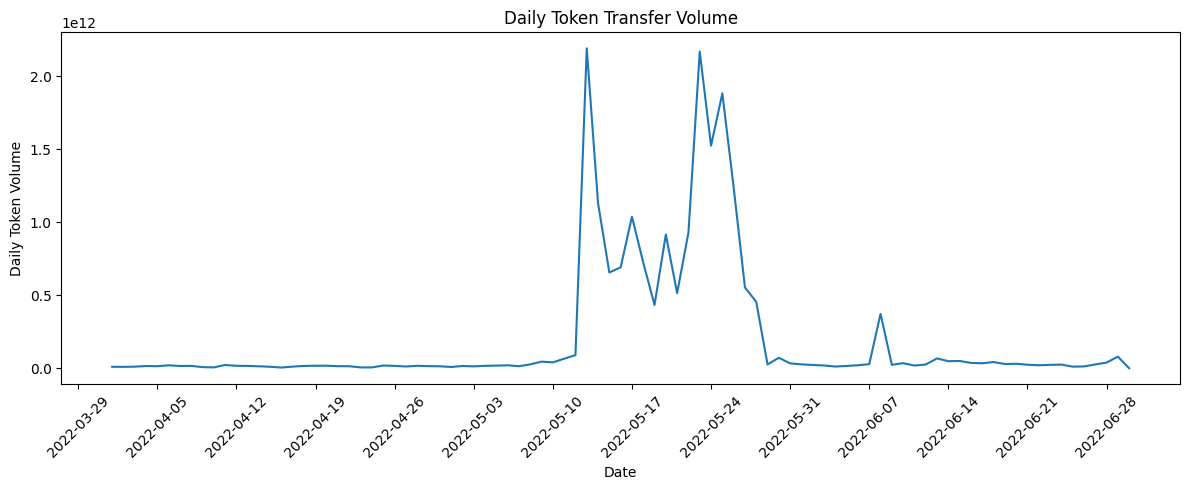

In [24]:
import matplotlib.dates as mdates

fig, ax = mlp.subplots(figsize=(12, 5))

ax.plot(daily_volume["date"], daily_volume["amount"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax.set_xlabel("Date")
ax.set_ylabel("Daily Token Volume")
ax.set_title("Daily Token Transfer Volume")

mlp.xticks(rotation=45)
mlp.tight_layout()
mlp.show()

luna vs other coins

In [64]:
coinCols = [
    "timestamp",
    "open",
    "high",
    "low",
    "close"
]

DAI_df = pd.read_csv("../data/ERC20-stablecoins//price_data/dai_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

PAX_df = pd.read_csv("../data/ERC20-stablecoins//price_data/pax_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

USDC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdc_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

USDT_df = pd.read_csv("../data/ERC20-stablecoins//price_data/usdt_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

USTC_df = pd.read_csv("../data/ERC20-stablecoins//price_data/ustc_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

WLUNA_df = pd.read_csv("../data/ERC20-stablecoins//price_data/wluna_price_data.csv",
    # sep="\t",
    header=None,
    skiprows=1,
    names=coinCols
)

DAI_df["timestamp"] = pd.to_datetime(DAI_df["timestamp"], unit="s", utc = True)
PAX_df["timestamp"] = pd.to_datetime(PAX_df["timestamp"], unit="s", utc = True)
USDC_df["timestamp"] = pd.to_datetime(USDC_df["timestamp"], unit="s", utc = True)
USDT_df["timestamp"] = pd.to_datetime(USDT_df["timestamp"], unit="s", utc = True)
USTC_df["timestamp"] = pd.to_datetime(USTC_df["timestamp"], unit="s", utc = True)
WLUNA_df["timestamp"] = pd.to_datetime(WLUNA_df["timestamp"], unit="s", utc = True)

cutoff_date = pd.Timestamp("2022-05-22", tz="UTC")
cutfrom_date = pd.Timestamp("2022-04-15", tz="UTC")

DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

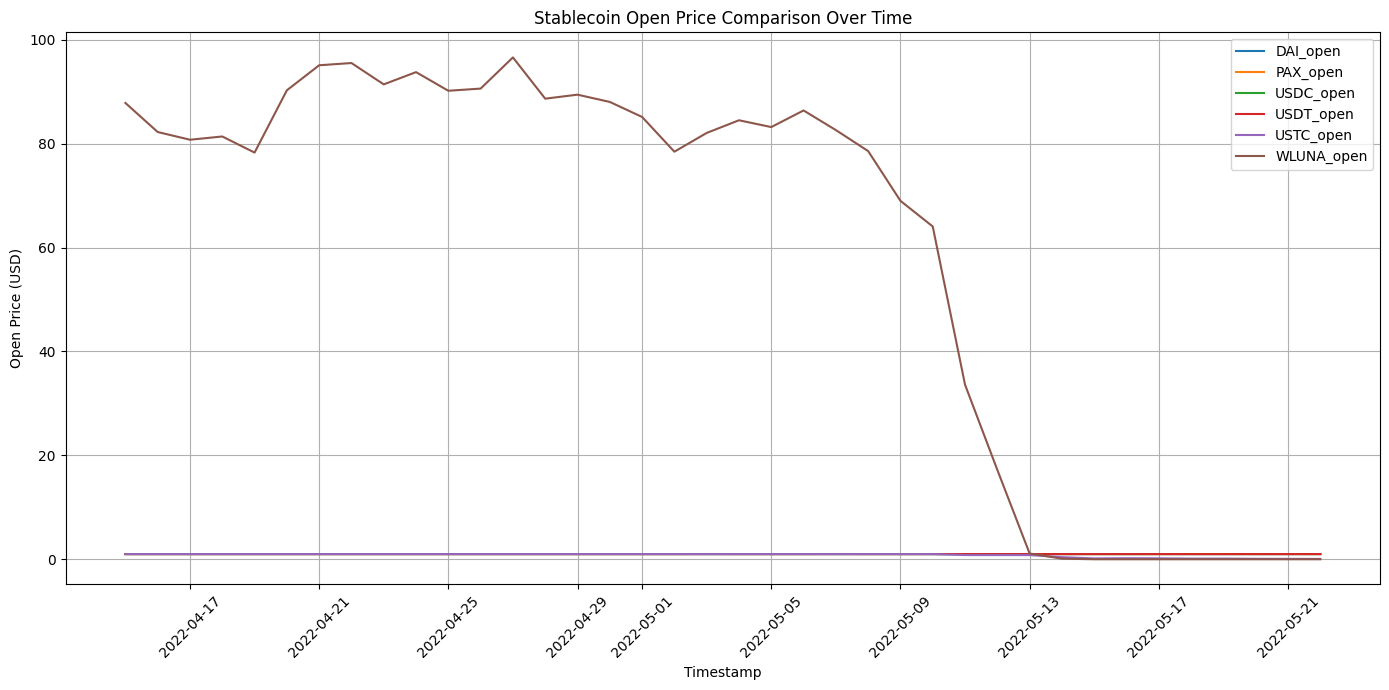

In [65]:
mlp.figure(figsize=(14, 7))

mlp.plot(DAI_df["timestamp"], DAI_df["open"], label="DAI_open")
mlp.plot(PAX_df["timestamp"], PAX_df["open"], label="PAX_open")
mlp.plot(USDC_df["timestamp"], USDC_df["open"], label="USDC_open")
mlp.plot(USDT_df["timestamp"], USDT_df["open"], label="USDT_open")
mlp.plot(USTC_df["timestamp"], USTC_df["open"], label="USTC_open")
mlp.plot(WLUNA_df["timestamp"], WLUNA_df["open"], label="WLUNA_open")

# mlp.plot(DAI_df["timestamp"], DAI_df["close"], label="DAI_close")
# mlp.plot(PAX_df["timestamp"], PAX_df["close"], label="PAX_close")
# mlp.plot(USDC_df["timestamp"], USDC_df["close"], label="USDC_close")
# mlp.plot(USDT_df["timestamp"], USDT_df["close"], label="USDT_close")
# mlp.plot(USTC_df["timestamp"], USTC_df["close"], label="USTC_close")
# mlp.plot(WLUNA_df["timestamp"], WLUNA_df["close"], label="WLUNA_close")

# mlp.plot(DAI_df["timestamp"], DAI_df["high"], label="DAI_high")
# mlp.plot(PAX_df["timestamp"], PAX_df["high"], label="PAX_high")
# mlp.plot(USDC_df["timestamp"], USDC_df["high"], label="USDC_high")
# mlp.plot(USDT_df["timestamp"], USDT_df["high"], label="USDT_high")
# mlp.plot(USTC_df["timestamp"], USTC_df["high"], label="USTC_high")
# mlp.plot(WLUNA_df["timestamp"], WLUNA_df["high"], label="WLUNA_high")

# mlp.plot(DAI_df["timestamp"], DAI_df["low"], label="DAI_low")
# mlp.plot(PAX_df["timestamp"], PAX_df["low"], label="PAX_low")
# mlp.plot(USDC_df["timestamp"], USDC_df["low"], label="USDC_low")
# mlp.plot(USDT_df["timestamp"], USDT_df["low"], label="USDT_low")
# mlp.plot(USTC_df["timestamp"], USTC_df["low"], label="USTC_low")
# mlp.plot(WLUNA_df["timestamp"], WLUNA_df["low"], label="WLUNA_low")



mlp.xlabel("Timestamp")
mlp.ylabel("Open Price (USD)")
mlp.title("Stablecoin Open Price Comparison Over Time")
mlp.legend()
mlp.xticks(rotation = 45)
mlp.grid(True)
mlp.tight_layout()

mlp.show()

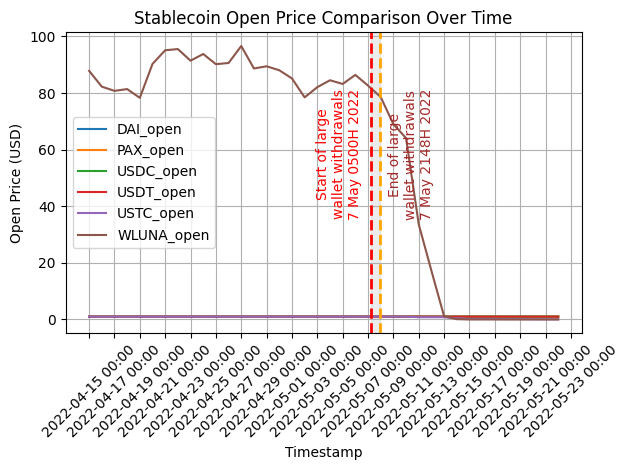

In [66]:
cutfrom_date = pd.Timestamp("2022-04-15 00:00", tz="UTC")
cutoff_date = pd.Timestamp("2022-05-22 23:59", tz="UTC")
startDraw_date = pd.Timestamp("2022-05-07 05:00", tz="UTC")
endDraw_date = pd.Timestamp("2022-05-07 21:48", tz="UTC")

DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

ax = mlp.gca()

# ticks every 6 hours
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# format: day + hour:minute
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))


mlp.plot(DAI_df["timestamp"], DAI_df["open"], label="DAI_open")
mlp.plot(PAX_df["timestamp"], PAX_df["open"], label="PAX_open")
mlp.plot(USDC_df["timestamp"], USDC_df["open"], label="USDC_open")
mlp.plot(USDT_df["timestamp"], USDT_df["open"], label="USDT_open")
mlp.plot(USTC_df["timestamp"], USTC_df["open"], label="USTC_open")
mlp.plot(WLUNA_df["timestamp"], WLUNA_df["open"], label="WLUNA_open")

# mlp.axvline(date , linestyle = "--", linewidth = 1.5)
ax.axvline(startDraw_date, linestyle="--", linewidth=2, color='red')
ax.axvline(endDraw_date, linestyle="--", linewidth=2, color='orange')
ax.axvspan(startDraw_date, endDraw_date, alpha = 0.15, color = "grey")

ylim = ax.get_ylim()  # get current y-axis limits
y_top = ylim[1]  # top of y-axis for placing text

offset1 = pd.Timedelta(days=2.5)
offset2 = pd.Timedelta(days=2.5)

ax.text(startDraw_date - offset1, y_top - 20, "Start of large\nwallet withdrawals\n7 May 0500H 2022",
        color="red", fontsize=10, ha="center", va="top", rotation=90)
ax.text(endDraw_date + offset2, y_top - 20, "End of large\nwallet withdrawals\n7 May 2148H 2022",
        color="brown", fontsize=10, ha="center", va="top", rotation=90)

mlp.xlabel("Timestamp")
mlp.ylabel("Open Price (USD)")
mlp.title("Stablecoin Open Price Comparison Over Time")
mlp.legend()
mlp.xticks(rotation = 45)
mlp.grid(True)
mlp.tight_layout()

mlp.show()

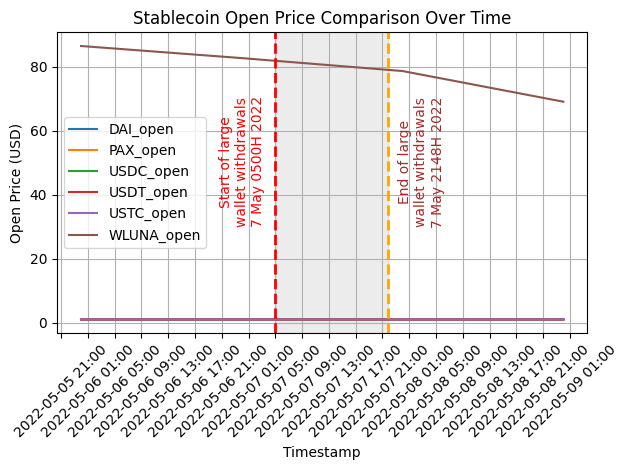

In [71]:
cutfrom_date = pd.Timestamp("2022-05-06 00:00", tz="UTC")
cutoff_date = pd.Timestamp("2022-05-09 06:00", tz="UTC")
startDraw_date = pd.Timestamp("2022-05-07 05:00", tz="UTC")
endDraw_date = pd.Timestamp("2022-05-07 21:48", tz="UTC")

DAI_df = DAI_df[(cutfrom_date <=  DAI_df["timestamp"]) & (DAI_df["timestamp"] <= cutoff_date)]
PAX_df = PAX_df[(cutfrom_date <= PAX_df["timestamp"]) & (PAX_df["timestamp"] <= cutoff_date)]
USDC_df = USDC_df[(cutfrom_date <= USDC_df["timestamp"]) & (USDC_df["timestamp"] <= cutoff_date)]
USDT_df = USDT_df[(cutfrom_date <= USDT_df["timestamp"]) & (USDT_df["timestamp"] <= cutoff_date)]
USTC_df = USTC_df[(cutfrom_date <= USTC_df["timestamp"]) & (USTC_df["timestamp"] <= cutoff_date)]
WLUNA_df = WLUNA_df[(cutfrom_date <= WLUNA_df["timestamp"]) & (WLUNA_df["timestamp"] <= cutoff_date)]

ax = mlp.gca()

# ticks every 6 hours
ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))

# format: day + hour:minute
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))

dateLines = {
    "Start of large wallet withdrawals" : "2022-05-07 05:00",
    "End of Large wallet withdrawals" : "2022-05-07 21:48"
}



mlp.plot(DAI_df["timestamp"], DAI_df["open"], label="DAI_open")
mlp.plot(PAX_df["timestamp"], PAX_df["open"], label="PAX_open")
mlp.plot(USDC_df["timestamp"], USDC_df["open"], label="USDC_open")
mlp.plot(USDT_df["timestamp"], USDT_df["open"], label="USDT_open")
mlp.plot(USTC_df["timestamp"], USTC_df["open"], label="USTC_open")
mlp.plot(WLUNA_df["timestamp"], WLUNA_df["open"], label="WLUNA_open")

# mlp.axvline(date , linestyle = "--", linewidth = 1.5)
ax.axvline(startDraw_date, linestyle="--", linewidth=2, color='red')
ax.axvline(endDraw_date, linestyle="--", linewidth=2, color='orange')
ax.axvspan(startDraw_date, endDraw_date, alpha = 0.15, color = "grey")

ylim = ax.get_ylim()  # get current y-axis limits
y_top = ylim[1]  # top of y-axis for placing text

offset1 = pd.Timedelta(hours=5)
offset2 = pd.Timedelta(hours=5)

ax.text(startDraw_date - offset1, y_top - 20, "Start of large\nwallet withdrawals\n7 May 0500H 2022",
        color="red", fontsize=10, ha="center", va="top", rotation=90)
ax.text(endDraw_date + offset2, y_top - 20, "End of large\nwallet withdrawals\n7 May 2148H 2022",
        color="brown", fontsize=10, ha="center", va="top", rotation=90)

mlp.xlabel("Timestamp")
mlp.ylabel("Open Price (USD)")
mlp.title("Stablecoin Open Price Comparison Over Time")
mlp.legend()
mlp.xticks(rotation = 45)
mlp.grid(True)
mlp.tight_layout()

mlp.show()